<a href="https://www.kaggle.com/code/mihtien/emotion-model?scriptVersionId=98103609" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import cv2
import keras
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, BatchNormalization,  Dropout, Flatten, Conv2D, MaxPooling2D
from sklearn.linear_model import Perceptron
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)
training_set=train.flow_from_directory('../input/emotion-dataset-train-val/emotion_train_val/train',target_size=(150,150), batch_size=64, class_mode='categorical')
validation_set=validation.flow_from_directory('../input/emotion-dataset-train-val/emotion_train_val/val',target_size=(150,150), batch_size=64, class_mode='categorical')

Found 30213 images belonging to 7 classes.
Found 7177 images belonging to 7 classes.


In [3]:
training_set.class_indices

{'BinhThuong': 0,
 'Buon': 1,
 'ChanGhet': 2,
 'HanhPhuc': 3,
 'NgacNhien': 4,
 'SoHai': 5,
 'TucGian': 6}

In [4]:
model = Sequential()
model.add(Conv2D(16,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(7,activation='softmax'))
model.summary()

2022-06-11 18:15:31.347394: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       7

2022-06-11 18:15:31.430622: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-11 18:15:31.431368: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-11 18:15:31.432575: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-11 18:15:31.432860: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [5]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=RMSprop(),loss='categorical_crossentropy',  metrics=['accuracy'])
history = model.fit(training_set, epochs = 300, validation_data = validation_set, verbose=1)

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
2022-06-11 18:15:34.020502: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300


2022-06-11 18:15:35.581297: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


473/473 [==============================] - 111s 220ms/step - loss: 4.1704 - accuracy: 0.3369 - val_loss: 1.6509 - val_accuracy: 0.3479
Epoch 2/300
473/473 [==============================] - 51s 107ms/step - loss: 1.3665 - accuracy: 0.4762 - val_loss: 1.3384 - val_accuracy: 0.4797
Epoch 3/300
473/473 [==============================] - 53s 113ms/step - loss: 1.1124 - accuracy: 0.5812 - val_loss: 1.2611 - val_accuracy: 0.5282
Epoch 4/300
473/473 [==============================] - 48s 102ms/step - loss: 0.7812 - accuracy: 0.7147 - val_loss: 1.3681 - val_accuracy: 0.5318
Epoch 5/300
473/473 [==============================] - 52s 111ms/step - loss: 0.3964 - accuracy: 0.8652 - val_loss: 1.7585 - val_accuracy: 0.5224
Epoch 6/300
473/473 [==============================] - 50s 105ms/step - loss: 0.1924 - accuracy: 0.9426 - val_loss: 2.4886 - val_accuracy: 0.5243
Epoch 7/300
473/473 [==============================] - 49s 103ms/step - loss: 0.1366 - accuracy: 0.9612 - val_loss: 2.6224 - val_accura

In [6]:
model.save('./emotion_model.h5')

Sai số kiểm tra là:  33.299163818359375
Độ chính xác kiểm tra là:  0.5251497626304626


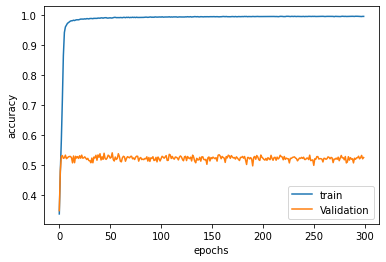

In [7]:
score = model.evaluate(validation_set,verbose=0)
print('Sai số kiểm tra là: ',score[0])
print('Độ chính xác kiểm tra là: ',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','Validation'])
plt.show()

In [8]:
from keras.models import load_model
emotion_model=load_model('./emotion_model.h5')

BinhThuong : 0.00 %
Buon : 100.00 %
ChanGhet : 0.00 %
HanhPhuc : 0.00 %
NgacNhien : 0.00 %
SoHai : 0.00 %
TucGian : 0.00 %
            
Tâm trạng:  Buon


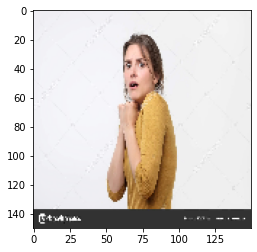

In [9]:
img_path = '../input/emotion-test/emoion_test/scare.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
classes = ['BinhThuong','Buon','ChanGhet','HanhPhuc','NgacNhien','SoHai','TucGian']
emotion=np.argmax(emotion_model.predict(img),axis=1)
a = emotion.item()
pred = emotion_model.predict(img)
print(classes[0],":","%.2f" %np.array(pred[0][0]*100),"%")
print(classes[1],":","%.2f" %np.array(pred[0][1]*100),"%")
print(classes[2],":","%.2f" %np.array(pred[0][2]*100),"%")
print(classes[3],":","%.2f" %np.array(pred[0][3]*100),"%")
print(classes[4],":","%.2f" %np.array(pred[0][4]*100),"%")
print(classes[5],":","%.2f" %np.array(pred[0][5]*100),"%")
print(classes[6],":","%.2f" %np.array(pred[0][6]*100),"%")
print("            ")
print("Tâm trạng: ", classes[a])

BinhThuong : 0.00 %
Buon : 0.00 %
ChanGhet : 0.00 %
HanhPhuc : 0.00 %
NgacNhien : 0.00 %
SoHai : 0.00 %
TucGian : 100.00 %
            
Tâm trạng:  TucGian


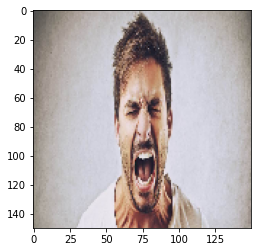

In [10]:
img_path = '../input/emotion-test/emoion_test/giandu.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
classes = ['BinhThuong','Buon','ChanGhet','HanhPhuc','NgacNhien','SoHai','TucGian']
emotion=np.argmax(emotion_model.predict(img),axis=1)
a = emotion.item()
pred = emotion_model.predict(img)
print(classes[0],":","%.2f" %np.array(pred[0][0]*100),"%")
print(classes[1],":","%.2f" %np.array(pred[0][1]*100),"%")
print(classes[2],":","%.2f" %np.array(pred[0][2]*100),"%")
print(classes[3],":","%.2f" %np.array(pred[0][3]*100),"%")
print(classes[4],":","%.2f" %np.array(pred[0][4]*100),"%")
print(classes[5],":","%.2f" %np.array(pred[0][5]*100),"%")
print(classes[6],":","%.2f" %np.array(pred[0][6]*100),"%")
print("            ")
print("Tâm trạng: ", classes[a])

BinhThuong : 0.00 %
Buon : 0.00 %
ChanGhet : 0.00 %
HanhPhuc : 100.00 %
NgacNhien : 0.00 %
SoHai : 0.00 %
TucGian : 0.00 %
            
Tâm trạng:  HanhPhuc


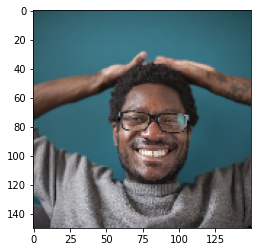

In [11]:
img_path = '../input/emotion-test/emoion_test/happy.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
classes = ['BinhThuong','Buon','ChanGhet','HanhPhuc','NgacNhien','SoHai','TucGian']
emotion=np.argmax(emotion_model.predict(img),axis=1)
a = emotion.item()
pred = emotion_model.predict(img)
print(classes[0],":","%.2f" %np.array(pred[0][0]*100),"%")
print(classes[1],":","%.2f" %np.array(pred[0][1]*100),"%")
print(classes[2],":","%.2f" %np.array(pred[0][2]*100),"%")
print(classes[3],":","%.2f" %np.array(pred[0][3]*100),"%")
print(classes[4],":","%.2f" %np.array(pred[0][4]*100),"%")
print(classes[5],":","%.2f" %np.array(pred[0][5]*100),"%")
print(classes[6],":","%.2f" %np.array(pred[0][6]*100),"%")
print("            ")
print("Tâm trạng: ", classes[a])

BinhThuong : 100.00 %
Buon : 0.00 %
ChanGhet : 0.00 %
HanhPhuc : 0.00 %
NgacNhien : 0.00 %
SoHai : 0.00 %
TucGian : 0.00 %
            
Tâm trạng:  BinhThuong


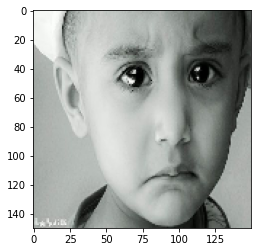

In [12]:
img_path = '../input/emotion-test/emoion_test/Buon.jpg'
img=load_img(img_path,target_size=(150,150))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,150,150,3)
img=img.astype('float32')
img=img/255
classes = ['BinhThuong','Buon','ChanGhet','HanhPhuc','NgacNhien','SoHai','TucGian']
emotion=np.argmax(emotion_model.predict(img),axis=1)
a = emotion.item()
pred = emotion_model.predict(img)
print(classes[0],":","%.2f" %np.array(pred[0][0]*100),"%")
print(classes[1],":","%.2f" %np.array(pred[0][1]*100),"%")
print(classes[2],":","%.2f" %np.array(pred[0][2]*100),"%")
print(classes[3],":","%.2f" %np.array(pred[0][3]*100),"%")
print(classes[4],":","%.2f" %np.array(pred[0][4]*100),"%")
print(classes[5],":","%.2f" %np.array(pred[0][5]*100),"%")
print(classes[6],":","%.2f" %np.array(pred[0][6]*100),"%")
print("            ")
print("Tâm trạng: ", classes[a])